In [1]:
### Importing pandas for data analysis
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Loading of train dataset
data=pd.read_csv('C:/Users/DNarayanappa/Desktop/twitter-sentiment-analysis-hatred-speech/train.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
## Loading of test dataset
output=pd.read_csv('C:/Users/DNarayanappa/Desktop/twitter-sentiment-analysis-hatred-speech/test.csv')

In [5]:
output.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


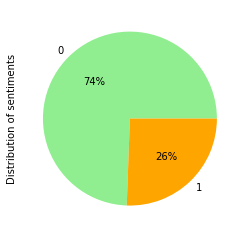

In [6]:
#Seeing the distribution of Positive and Negative speech in given Test Data Set
data['label'].value_counts().plot(kind='pie',autopct='%1.0f%%',colors=['lightgreen','orange'],label="Distribution of sentiments")

In [7]:
## Appending train and test tweet column
data1=data.append(output)

c:\users\dnarayanappa\desktop\python\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [8]:
data1.head()

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...


In [9]:
## Data cleaning---1. Removal of special characters
data1['new_comment']=data1['tweet'].str.replace('[^a-zA-Z]'," ")

In [10]:
data1.head()


,id,label,tweet,new_comment
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint Pregnancy Test https goo gl h ...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this Would you go talk makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...


In [11]:
## Making it lower case to work with NLTK functions
data1['new_comment']=data1['new_comment'].str.lower()

In [12]:
data1.tail()

,id,label,tweet,new_comment
1948,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...",samsunggalaxynote explodes burns year old...
1949,9870,NaN,Now Available - Hoodie. Check it out here - ht...,now available hoodie check it out here ht...
1950,9871,NaN,There goes a crack right across the screen. If...,there goes a crack right across the screen if...
1951,9872,NaN,@codeofinterest as i said #Adobe big time we m...,codeofinterest as i said adobe big time we m...
1952,9873,NaN,Finally I got it .. thanx my father .. #Samsun...,finally i got it thanx my father samsun...


In [13]:
#useful functions from nltk library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [14]:
# Words Tokenizing to remove stop words
data1['new_comment']=data1['new_comment'].apply(word_tokenize)

In [15]:
data1.head()

,id,label,tweet,new_comment
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,"[fingerprint, pregnancy, test, https, goo, gl,..."
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,"[finally, a, transparant, silicon, case, thank..."
2,3,0.0,We love this! Would you go? #talk #makememorie...,"[we, love, this, would, you, go, talk, makemem..."
3,4,0.0,I'm wired I know I'm George I was made that wa...,"[i, m, wired, i, know, i, m, george, i, was, m..."
4,5,1.0,What amazing service! Apple won't even talk to...,"[what, amazing, service, apple, won, t, even, ..."


In [16]:
## Removal of stop words
data1['new_comment']=data1['new_comment'].apply(lambda x: ' '.join([w for w in x if w not in stopwords.words('english')]))

In [17]:
##Removing less than 2 letter words as it is not much of useful

In [18]:
data1['new_comment']=data1['new_comment'].apply(lambda x:' '.join([w for w in x.split() if len(w)>2]))

In [19]:
data1.head()

,id,label,tweet,new_comment
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test https goo mfqv andr...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love would talk makememories unplug relax ipho...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know george made way iphone cute daventr...
4,5,1.0,What amazing service! Apple won't even talk to...,amazing service apple even talk question unles...


In [20]:
data1['new_comment'].head()

0    fingerprint pregnancy test https goo mfqv andr...
1    finally transparant silicon case thanks uncle ...
2    love would talk makememories unplug relax ipho...
3    wired know george made way iphone cute daventr...
4    amazing service apple even talk question unles...
Name: new_comment, dtype: object

In [21]:
## Lemmatizing

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
lem=WordNetLemmatizer()

In [24]:
data1['new_comment']=data1['new_comment'].apply(lambda x: ' '.join(lem.lemmatize(x,pos='v') for x in x.split()))

In [28]:
### determing the most frequent words in Wordcloud visualization
from wordcloud import WordCloud

In [29]:
## Positive tweets
words_pos=' '.join([text for text in data1['new_comment'][data1['label']==0.0]])

In [30]:
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110,max_words=20,background_color='white').generate(words_pos)

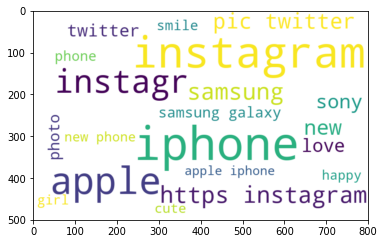

In [31]:
plt.imshow(wordcloud,interpolation='bilinear')

In [32]:
## Negative tweets
words_neg=' '.join([text for text in data1['new_comment'][data1['label']==1.0]])

In [33]:
wordcloud1=WordCloud(width=800,height=500,random_state=21,max_font_size=110,max_words=20,background_color='white').generate(words_neg)

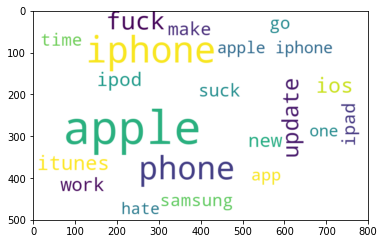

In [34]:
plt.imshow(wordcloud1,interpolation='bilinear')

In [35]:
##TF IDF vectorizer (normalizing) -- Converting text to numeric form(so that it can be applied to Algorithms)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vect=TfidfVectorizer()

In [38]:
data1['new_comment']=list(vect.fit_transform(data1['new_comment']).toarray())

In [39]:
## train test split for validation
data1_train=data1.iloc[0:7920]

In [40]:
data1_test=data1.iloc[7920:]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(data1_train['new_comment'],data1_train['label'],test_size=0.3,random_state=100)

In [43]:
####Using Naive Bayes algorithm for analysis
from sklearn.naive_bayes import GaussianNB

In [44]:
clf=GaussianNB()

In [45]:
model=clf.fit(x_train.to_list(),y_train.to_list())

In [46]:
## Predicting on test set
predict=model.predict(x_test.to_list())

In [47]:
## Calculating accuracy of the model
from sklearn.metrics import accuracy_score

In [48]:
print(accuracy_score(y_test,predict))

0.7857744107744108


In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
print(confusion_matrix(y_test,predict))

[[1438  336]
 [ 173  429]]


In [51]:
###Predicting on test data set

In [52]:
result=model.predict(data1_test['new_comment'].to_list())

In [53]:
result

array([1., 1., 1., ..., 1., 1., 0.])